# TP 7 - SVM linéaire et validation croisée

**L’objectif** de cette séance de travaux pratiques est de montrer l’utilisation des techniques de validation croisée pour l’évaluation et la comparaison de modèles décisionnels, ainsi que des méthodes de recherche de valeurs pour les hyper-paramètres (comme le coefficient de régularisation).

## 1 - Estimation des performances par validation croisée

Afin d’illustrer l’utilisation de la validation croisée, nous considérons un problème de classification sur le dataset Iris. Pour rappel, celui-ci consiste à identifier à quelle espèce appartient une plante parmi trois possibilités (*Iris Setosa*, *Iris Virginica* et *Iris Versicolor*) à partir de la longueur et la largeur des sépales et des pétales.

Nous employons des perceptrons multi-couches (PMC) avec une seule couche cachée de 100 neurones et une valeur $ \alpha = 1 $ pour la constante de régularisation (pondération du terme d’oubli ou *weight decay*). Il n’est pas indispensable pour cette séance de savoir en détails comment fonctionnent ces réseaux de neurones.

La validation croisée sera utilisée pour estimer les performances de généralisation *à partir de l’ensemble d’apprentissage*. Ensuite, cette estimation sera comparée à l’estimation obtenue sur l’ensemble de test que nous avions mis de côté au départ. Les explications sur la validation croisée et sa mise en œuvre dans Scikit-learn se trouvent [dans la documentation](http://scikit-learn.org/stable/modules/cross_validation.html).

In [112]:
# importations
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# chargement du jeu de données Iris
from sklearn import datasets
iris = datasets.load_iris()
data, labels = iris.data, iris.target

# découpage initial en données d'apprentissage et données de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.5)

La fonction train_test_split de scikit-learn nous permet de diviser aléatoirement le jeu de données en deux partitions train (apprentissage) et test (évaluation) selon des proportions arbitraires.

Comme d’habitude, il est intéressant de visualiser les données à notre disposition. Nous pouvons construire les nuages de points en deux dimensions à l’aide de Matplotlib :

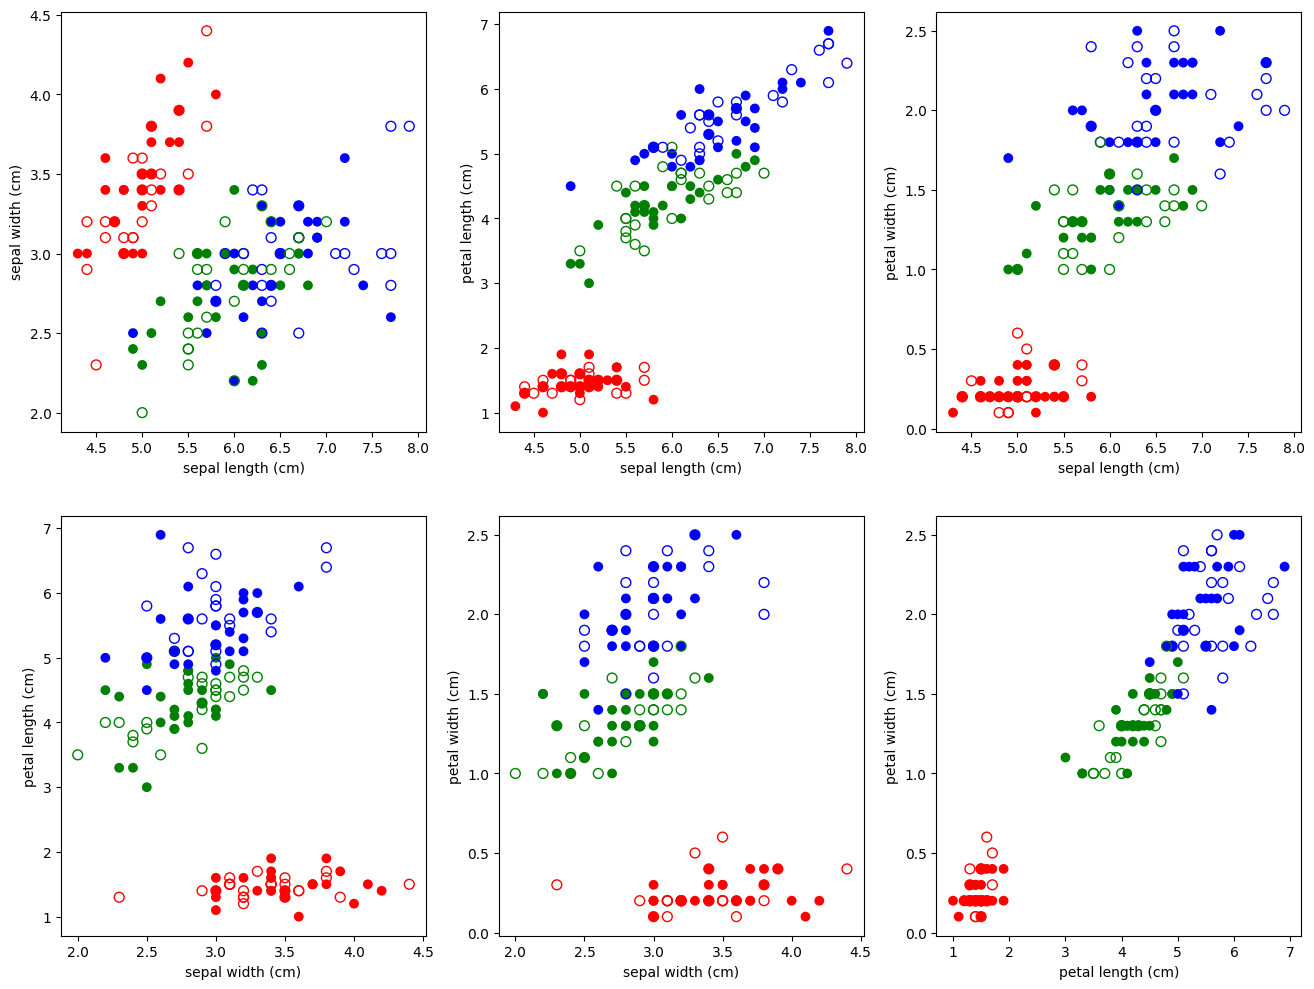

In [113]:
fig = plt.figure(figsize=(16, 12))
n_features = data.shape[-1]
n_plots = 6
idx = 1
cmp = np.array(['r', 'g', 'b'])
for dim1 in range(0, n_features):
    for dim2 in range(dim1+1, n_features):
        fig.add_subplot(2, n_plots // 2, idx)
        plt.scatter(X_train[:, dim1], X_train[:, dim2],c=cmp[y_train], s=50, edgecolors='none')
        plt.scatter(X_test[:,  dim1], X_test[:, dim2], c='none',  s=50, edgecolors=cmp[y_test])
        plt.xlabel(iris.feature_names[dim1])
        plt.ylabel(iris.feature_names[dim2])
        idx += 1
plt.show()

## Question

Pourquoi a-t-on six nuages de points différents ? Que représente chaque figure ?

Pour ce problème de classement, nous allons utiliser un perceptron multi-couches (MLP) avec les valeurs par défaut proposés par scikit-learn pour le nombre de couches (1) et de neurones (100).

In [10]:
# emploi de PMC
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1, tol=5e-3)

Pour estimer l’erreur de généralisation, nous allons utiliser la validation croisée *K-fold*. Cela va nous permettre d’ajuster, si besoin, les hyperparamètres du modèle décisionnel. scikit-learn implémente diverses stratégies de validation croisée dans le module sklearn.model_selection. Commençons par expérimenter avec l’approche *K-fold*. L’objet KFold dispose d’une méthode .split() qui permet de générer les listes des indices des observations à utiliser pour le sous-jeu d’apprentissage et pour le sous-jeu de *validation*. Plus de détails sur cet objet se trouvent dans la [documentation de K-Fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

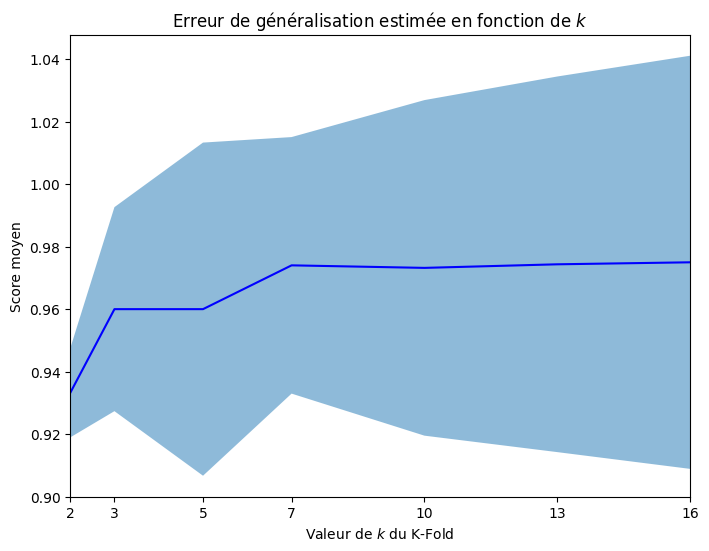

In [13]:
# KFold pour différentes valeurs de k
from sklearn.model_selection import KFold

# valeurs de k
n_folds = np.array([2, 3, 5, 7, 10, 13, 16])

# préparation des listes pour stocker les résultats
cv_scores = []
cv_scores_std = []

for k in n_folds:    # pour chaque valeur de k
    kf = KFold(n_splits=k)
    scores = []
    # apprentissage puis évaluation d'un modèle sur chaque split
    for train_idx, val_idx in kf.split(X_train):
        # apprentissage avec .fit()
        clf.fit(X_train[train_idx], y_train[train_idx])
        scores.append(clf.score(X_train[val_idx], y_train[val_idx]))
    # calcul de la moyenne et de l'écart-type des performances obtenues
    cv_scores.append(np.mean(scores))
    cv_scores_std.append(np.std(scores))

cv_scores, cv_scores_std = np.array(cv_scores), np.array(cv_scores_std)

# affichage performance moyenne +- 1 écart-type pour chaque k
plt.figure(figsize=(8, 6))
plt.plot(n_folds, cv_scores, 'b')
plt.fill_between(n_folds, cv_scores + cv_scores_std, cv_scores - cv_scores_std, alpha=0.5)
plt.xlabel("Valeur de $k$ du K-Fold")
plt.ylabel("Score moyen")
plt.xlim(2, max(n_folds))
plt.xticks(n_folds)
plt.title("Erreur de généralisation estimée en fonction de $k$")
plt.show()

## Question :

Que constatez-vous en examinant ce graphique ? Ajoutez des valeurs pour *k* (par ex. 20, 40...) et affichez de nouveau le graphique.

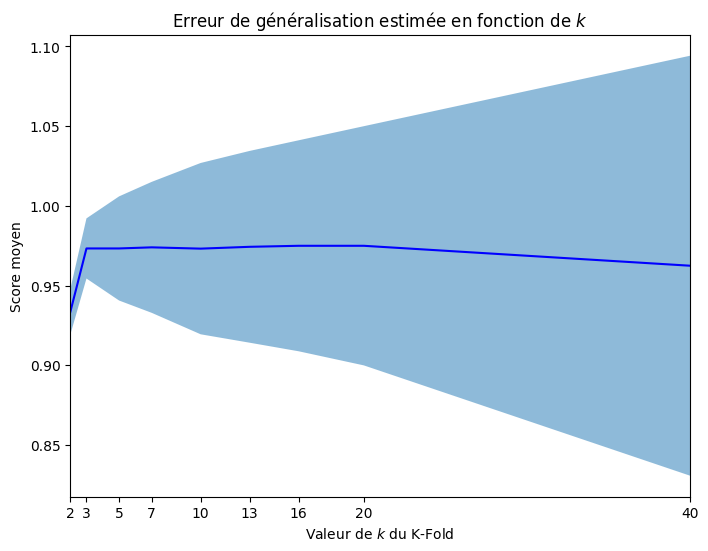

In [14]:
# KFold pour différentes valeurs de k
from sklearn.model_selection import KFold

# valeurs de k
n_folds = np.array([2, 3, 5, 7, 10, 13, 16, 20, 40])

# préparation des listes pour stocker les résultats
cv_scores = []
cv_scores_std = []

for k in n_folds:    # pour chaque valeur de k
    kf = KFold(n_splits=k)
    scores = []
    # apprentissage puis évaluation d'un modèle sur chaque split
    for train_idx, val_idx in kf.split(X_train):
        # apprentissage avec .fit()
        clf.fit(X_train[train_idx], y_train[train_idx])
        scores.append(clf.score(X_train[val_idx], y_train[val_idx]))
    # calcul de la moyenne et de l'écart-type des performances obtenues
    cv_scores.append(np.mean(scores))
    cv_scores_std.append(np.std(scores))

cv_scores, cv_scores_std = np.array(cv_scores), np.array(cv_scores_std)

# affichage performance moyenne +- 1 écart-type pour chaque k
plt.figure(figsize=(8, 6))
plt.plot(n_folds, cv_scores, 'b')
plt.fill_between(n_folds, cv_scores + cv_scores_std, cv_scores - cv_scores_std, alpha=0.5)
plt.xlabel("Valeur de $k$ du K-Fold")
plt.ylabel("Score moyen")
plt.xlim(2, max(n_folds))
plt.xticks(n_folds)
plt.title("Erreur de généralisation estimée en fonction de $k$")
plt.show()

## Question :

Pour chaque modèle appris par validation croisée *k-fold*, ajoutez son évaluation sur les données de test mises de côté au départ `X_test, y_test`. Affichez les courbes sur le même graphique. Que constatez-vous ?

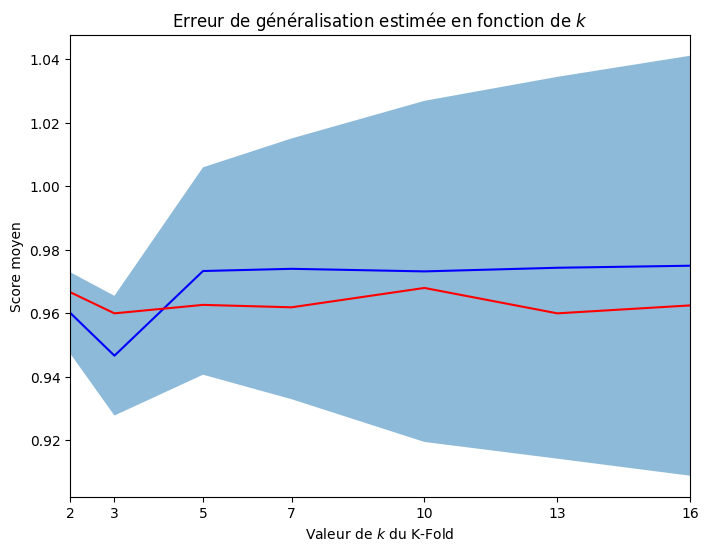

In [21]:
# valeurs de k
n_folds = np.array([2, 3, 5, 7, 10, 13, 16])

# préparation des listes pour stocker les résultats
cv_scores = []
cv_scores_std = []
cv_test_scores = []

for k in n_folds:    # pour chaque valeur de k
    kf = KFold(n_splits=k)
    scores = []
    test_scores = []
    # apprentissage puis évaluation d'un modèle sur chaque split
    for train_idx, val_idx in kf.split(X_train):
        # apprentissage avec .fit()
        clf.fit(X_train[train_idx], y_train[train_idx])
        scores.append(clf.score(X_train[val_idx], y_train[val_idx]))
        test_scores.append(clf.score(X_test,y_test))
    # calcul de la moyenne et de l'écart-type des performances obtenues
    cv_scores.append(np.mean(scores))
    cv_scores_std.append(np.std(scores))
    cv_test_scores.append(np.mean(test_scores))

cv_scores, cv_scores_std, cv_test_scores = np.array(cv_scores), np.array(cv_scores_std), np.array(cv_test_scores)

# affichage performance moyenne +- 1 écart-type pour chaque k
plt.figure(figsize=(8, 6))
plt.plot(n_folds, cv_scores, 'b')
plt.plot(n_folds, cv_test_scores, 'r')
plt.fill_between(n_folds, cv_scores + cv_scores_std, cv_scores - cv_scores_std, alpha=0.5)
plt.xlabel("Valeur de $k$ du K-Fold")
plt.ylabel("Score moyen")
plt.xlim(2, max(n_folds))
plt.xticks(n_folds)
plt.title("Erreur de généralisation estimée en fonction de $k$")
plt.show()

## Question :

Réalisez l’estimation des performances en utilisant la [validation croisée leave one out (LOO)](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html#sklearn.model_selection.LeaveOneOut). Que constatez-vous en comparant les résultats de *k-fold* et de *leave one out* ?

In [22]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

# valeurs de k
n_folds = np.array([2, 3, 5, 7, 10, 13, 16])



scores = []
test_scores = []
# apprentissage puis évaluation d'un modèle sur chaque split
for train_idx, val_idx in loo.split(X_train):
    # apprentissage avec .fit()
    clf.fit(X_train[train_idx], y_train[train_idx])
    scores.append(clf.score(X_train[val_idx], y_train[val_idx]))
    test_scores.append(clf.score(X_test,y_test))
# calcul de la moyenne et de l'écart-type des performances obtenues
mean_score = np.mean(scores)
std_score = np.std(scores)
test_score = np.mean(test_scores)


print('loo_score =', mean_score, 'loo_std =', std_score, 'test =', test_score)

loo_score = 0.9733333333333334 loo_std = 0.16110727964792762 test = 0.9624888888888887


## Note

Pour l’illustration, nous avons itéré ici manuellement à l’aide des itérateurs KFold et LeaveOneOut. Toutefois il est possible d’automatiser ce procédé dans le cas du *KFold* à l’aide de la fonction cross_val_score:

In [24]:
from sklearn.model_selection import cross_val_score
clf = MLPClassifier(solver='lbfgs', alpha=1, tol=5e-3)

# Cross-validation KFold avec k=5
scores = cross_val_score(clf, X_train, y_train, cv=5)

print('Scores de validation avec k=5 : ', scores)
print('Score moyen : ', np.mean(scores))

[0.93333333 1.         1.         0.93333333 1.        ]



Cette fonction prend des paramètres supplémentaires (métriques, parallélisation, etc.) qui sont décrites dans [sa documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score).


<a id='chap-tpsvmlineaires'></a>

# 2 - SVM linéaires


L’objectif est d’illustration l’utilisation des machines à vecteurs de support  (*Support Vector Machines*, SVM) pour les problèmes de classification linéaires en python avec Scikit-learn.

Références externes utiles :

> - [Documentation NumPy](https://docs.scipy.org/doc/numpy/user/index.html)  
- [Documentation SciPy](https://docs.scipy.org/doc/scipy/reference/)  
- [Documentation MatPlotLib](http://matplotlib.org/)  
- [Site scikit-learn](http://scikit-learn.org/stable/index.html)  
- [Site langage python](https://www.python.org)  
- [Site LibSVM](https://www.csie.ntu.edu.tw/~cjlin/libsvm/)  
- [Site LibLinear](https://www.csie.ntu.edu.tw/~cjlin/liblinear/)  

## Machines à vecteurs de support linéaires

Les machines à vecteurs de support (SVM : *Support Vector Machines*) sont une classe de méthodes d’apprentissage statistique basées sur le principe de la maximisation de la marge (séparation des classes). Il existe plusieurs formulations (linéaires, versions à noyaux) qui peuvent s’appliquer sur des données séparables (linéairement) mais aussi sur des données non séparables.

Les avantages des SVM :

- Très efficaces en dimension élevée.  
- Ils sont aussi efficaces dans le cas où la dimension de l’espace est plus grande que le nombre d’échantillons d’apprentissage.  
- Pour la décision, n’utilisent pas tous les échantillons d’apprentissage, mais seulement une partie (les vecteurs de support). En conséquence, ces algorithmes demandent moins de mémoire.  


Désavantages :

- Si le nombre d’attributs est beaucoup plus grand que le nombre d’échantillons, les performances sont moins bonnes.  
- Comme il s’agit de méthodes de discrimination entre les classes, elles ne fournissent pas d’estimations de probabilités.  

On continue avec le dataset iris. Pour commencer, nous ne conservons que les deux premiers attributs du jeu de données :

In [97]:
X, y = iris.data[:, :2], iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

Nous pouvons maintenant entraîner une machine à vecteur de support linéaire :

In [98]:
from sklearn import svm

C = 1.0 # paramètre de régularisation
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)

C:\Users\joach\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

## Question

Calculez le score d’échantillons bien classifiés sur le jeu de données de test.

## Correction

In [99]:
lin_svc.score(X_test, y_test)

0.7733333333333333

Visualisons maintenant la surface de décision apprise par notre modèle :

Text(0.5, 1.0, 'LinearSVC')

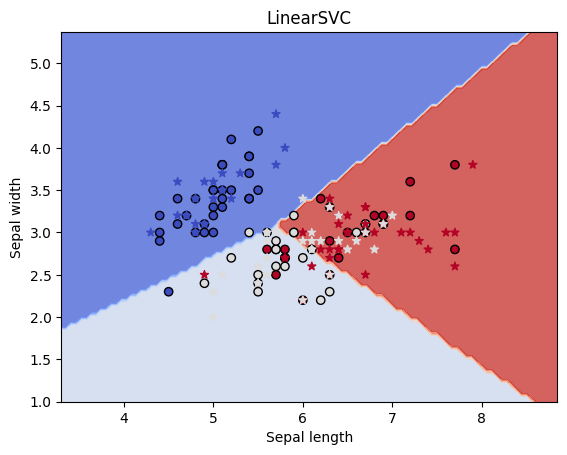

In [100]:
# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Surface de décision
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("LinearSVC")

## Question :

Afficher de nouveau les frontières de décision en testant différentes valeurs pour le paramètre C. Comment la frontière de décision évolue en fonction de C ?

C:\Users\joach\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Text(0.5, 1.0, 'LinearSVC, C = 0.1')]

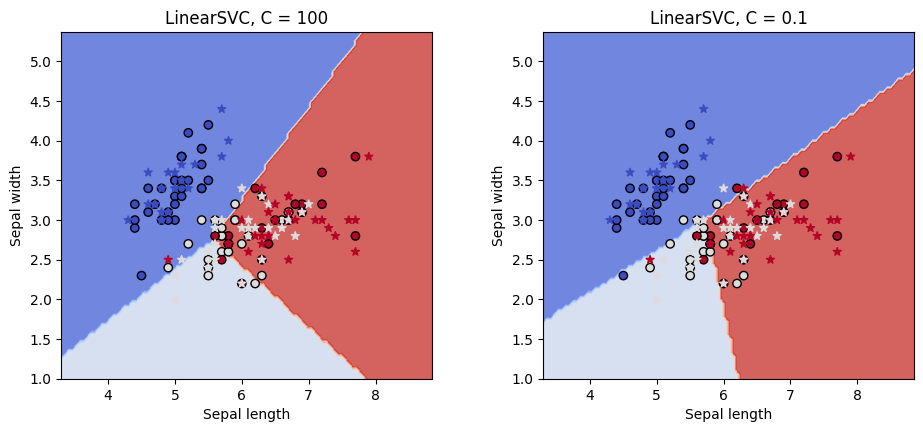

In [101]:
C = 100 # paramètre de régularisation
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)


# Surface de décision
Z_100 = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z_100 = Z_100.reshape(xx.shape)

C = 0.1 # paramètre de régularisation
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)


# Surface de décision
Z_01 = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z_01 = Z_01.reshape(xx.shape)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4.5))
fig.subplots_adjust(wspace=0.3)

ax1.contourf(xx, yy, Z_100, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
ax1.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
ax1.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
ax1.set_xlabel('Sepal length')
ax1.set_ylabel('Sepal width')
ax1.set(title="LinearSVC, C = 100")

ax2.contourf(xx, yy, Z_01, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
ax2.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
ax2.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
ax2.set_xlabel('Sepal length')
ax2.set_ylabel('Sepal width')
ax2.set(title="LinearSVC, C = 0.1")

## Question

On va maintenant utiliser la validation croisée pour tester différentes valeurs du paramètre `C`. La fonction `GridSearchCV` de scikit-learn va s'occuper de tester les différentes valeurs pour nous. Afficher les scores de validation obtenus pour les différentes valeurs de `C`.

In [106]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[1,3,5,10,20,50,100,1000]}
svc = svm.LinearSVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)

C:\Users\joach\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\joach\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\joach\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\joach\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\joach\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.w

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [1, 3, 5, 10, 20, 50, 100, 1000]})

In [107]:
print(clf.cv_results_['mean_test_score'])

[0.8        0.81333333 0.82666667 0.74666667 0.74666667 0.74666667
 0.77333333 0.8       ]


## Question

D’après la visualisation ci-dessus, ce modèle vous paraît-il adapté au problème ? Si non, que peut-on faire pour l’améliorer ?

## Correction

Le classifieur produit des frontières de décision linéaire. Cela suffit à séparer une des trois classes des deux autres, toutefois en ne considérant que les deux premiers attributs, les deux autres classes ne semblent pas linéairement séparables.

Il faudrait soit utiliser un modèle non linéaire, soit ajouter des attributs supplémentaires en espérant qu’ils permettront de séparer linéairement les deux classes restantes.

Pour l’instant, nous n’avons exploité que deux variables explicatives. Néanmoins, l’intérêt des machines à vecteur de support linéaires est qu’il est souvent plus facile de trouver des hyperplans séparateurs dans des espaces de grande dimension.

## Question

Réalisez l’optimisation d’une nouvelle machine à vecteur de support linéaire mais en utilisant les quatre attributs du jeu de données Iris. Le score de classification en test a-t-il augmenté ? Pourquoi ?

## Correction

In [110]:
C = 1

X, y = iris.data, iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)
lin_svc.score(X_test, y_test)

C:\Users\joach\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9666666666666667

Le score augmente (de 0,75 à 0,9 en général) car les deux attributs que nous avons ajouté permettent de mieux séparer les trois classes.

## 3 - Jeu de données Digits

Le jeu de données Digits est une collection d’images de chiffres manuscrits. Elles peuvent se charger directement depuis scikit-learn :

In [111]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

## Question :

Utilisez les données Digits pour construire un classifieur LinearSVC et évaluez-le. Si le temps d’apprentissage est trop long, sélectionnez une partie plus petite de la base d’apprentissage (par exemple 10000 échantillons). Pour quelle valeur de C on obtient le meilleurs résultats de généralisation ? Utiliser la validation croisée avec `GridSearchCV`.